In [57]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from umap import UMAP
from sklearn.preprocessing import MaxAbsScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import json

# Загрузка датасета

In [58]:
tracks = pd.read_csv(r'D:\Artem\Magistrature\1_sem\intellg_systems_and_techno\labs\datasets\FMA\tracks.csv')

In [59]:
tracks.drop(columns = ['Unnamed: 0'],inplace=True)

In [60]:
tracks

,favorites,id,listens,tracks,comments,latitude,longitude,bit_rate,duration,interest
0,4.0,1.0,6073.0,7.0,0.0,40.058324,-74.405661,256000.0,168.0,4656.0
1,4.0,1.0,6073.0,7.0,0.0,40.058324,-74.405661,256000.0,237.0,1470.0
2,4.0,1.0,6073.0,7.0,0.0,40.058324,-74.405661,256000.0,206.0,1933.0
3,2.0,4.0,2710.0,13.0,2.0,51.895927,0.891874,256000.0,311.0,978.0
4,2.0,4.0,2710.0,13.0,2.0,51.895927,0.891874,256000.0,181.0,1060.0
...,...,...,...,...,...,...,...,...,...,...
44539,-1.0,-1.0,-1.0,-1.0,0.0,45.512303,-73.554431,160000.0,379.0,609.0
44540,-1.0,-1.0,-1.0,-1.0,0.0,45.512303,-73.554431,160000.0,299.0,980.0
44541,-1.0,-1.0,-1.0,-1.0,7.0,46.053219,8.986100,192000.0,269.0,41.0
44542,0.0,20610.0,31847.0,6.0,3.0,35.670479,139.740921,256000.0,193.0,1912.0


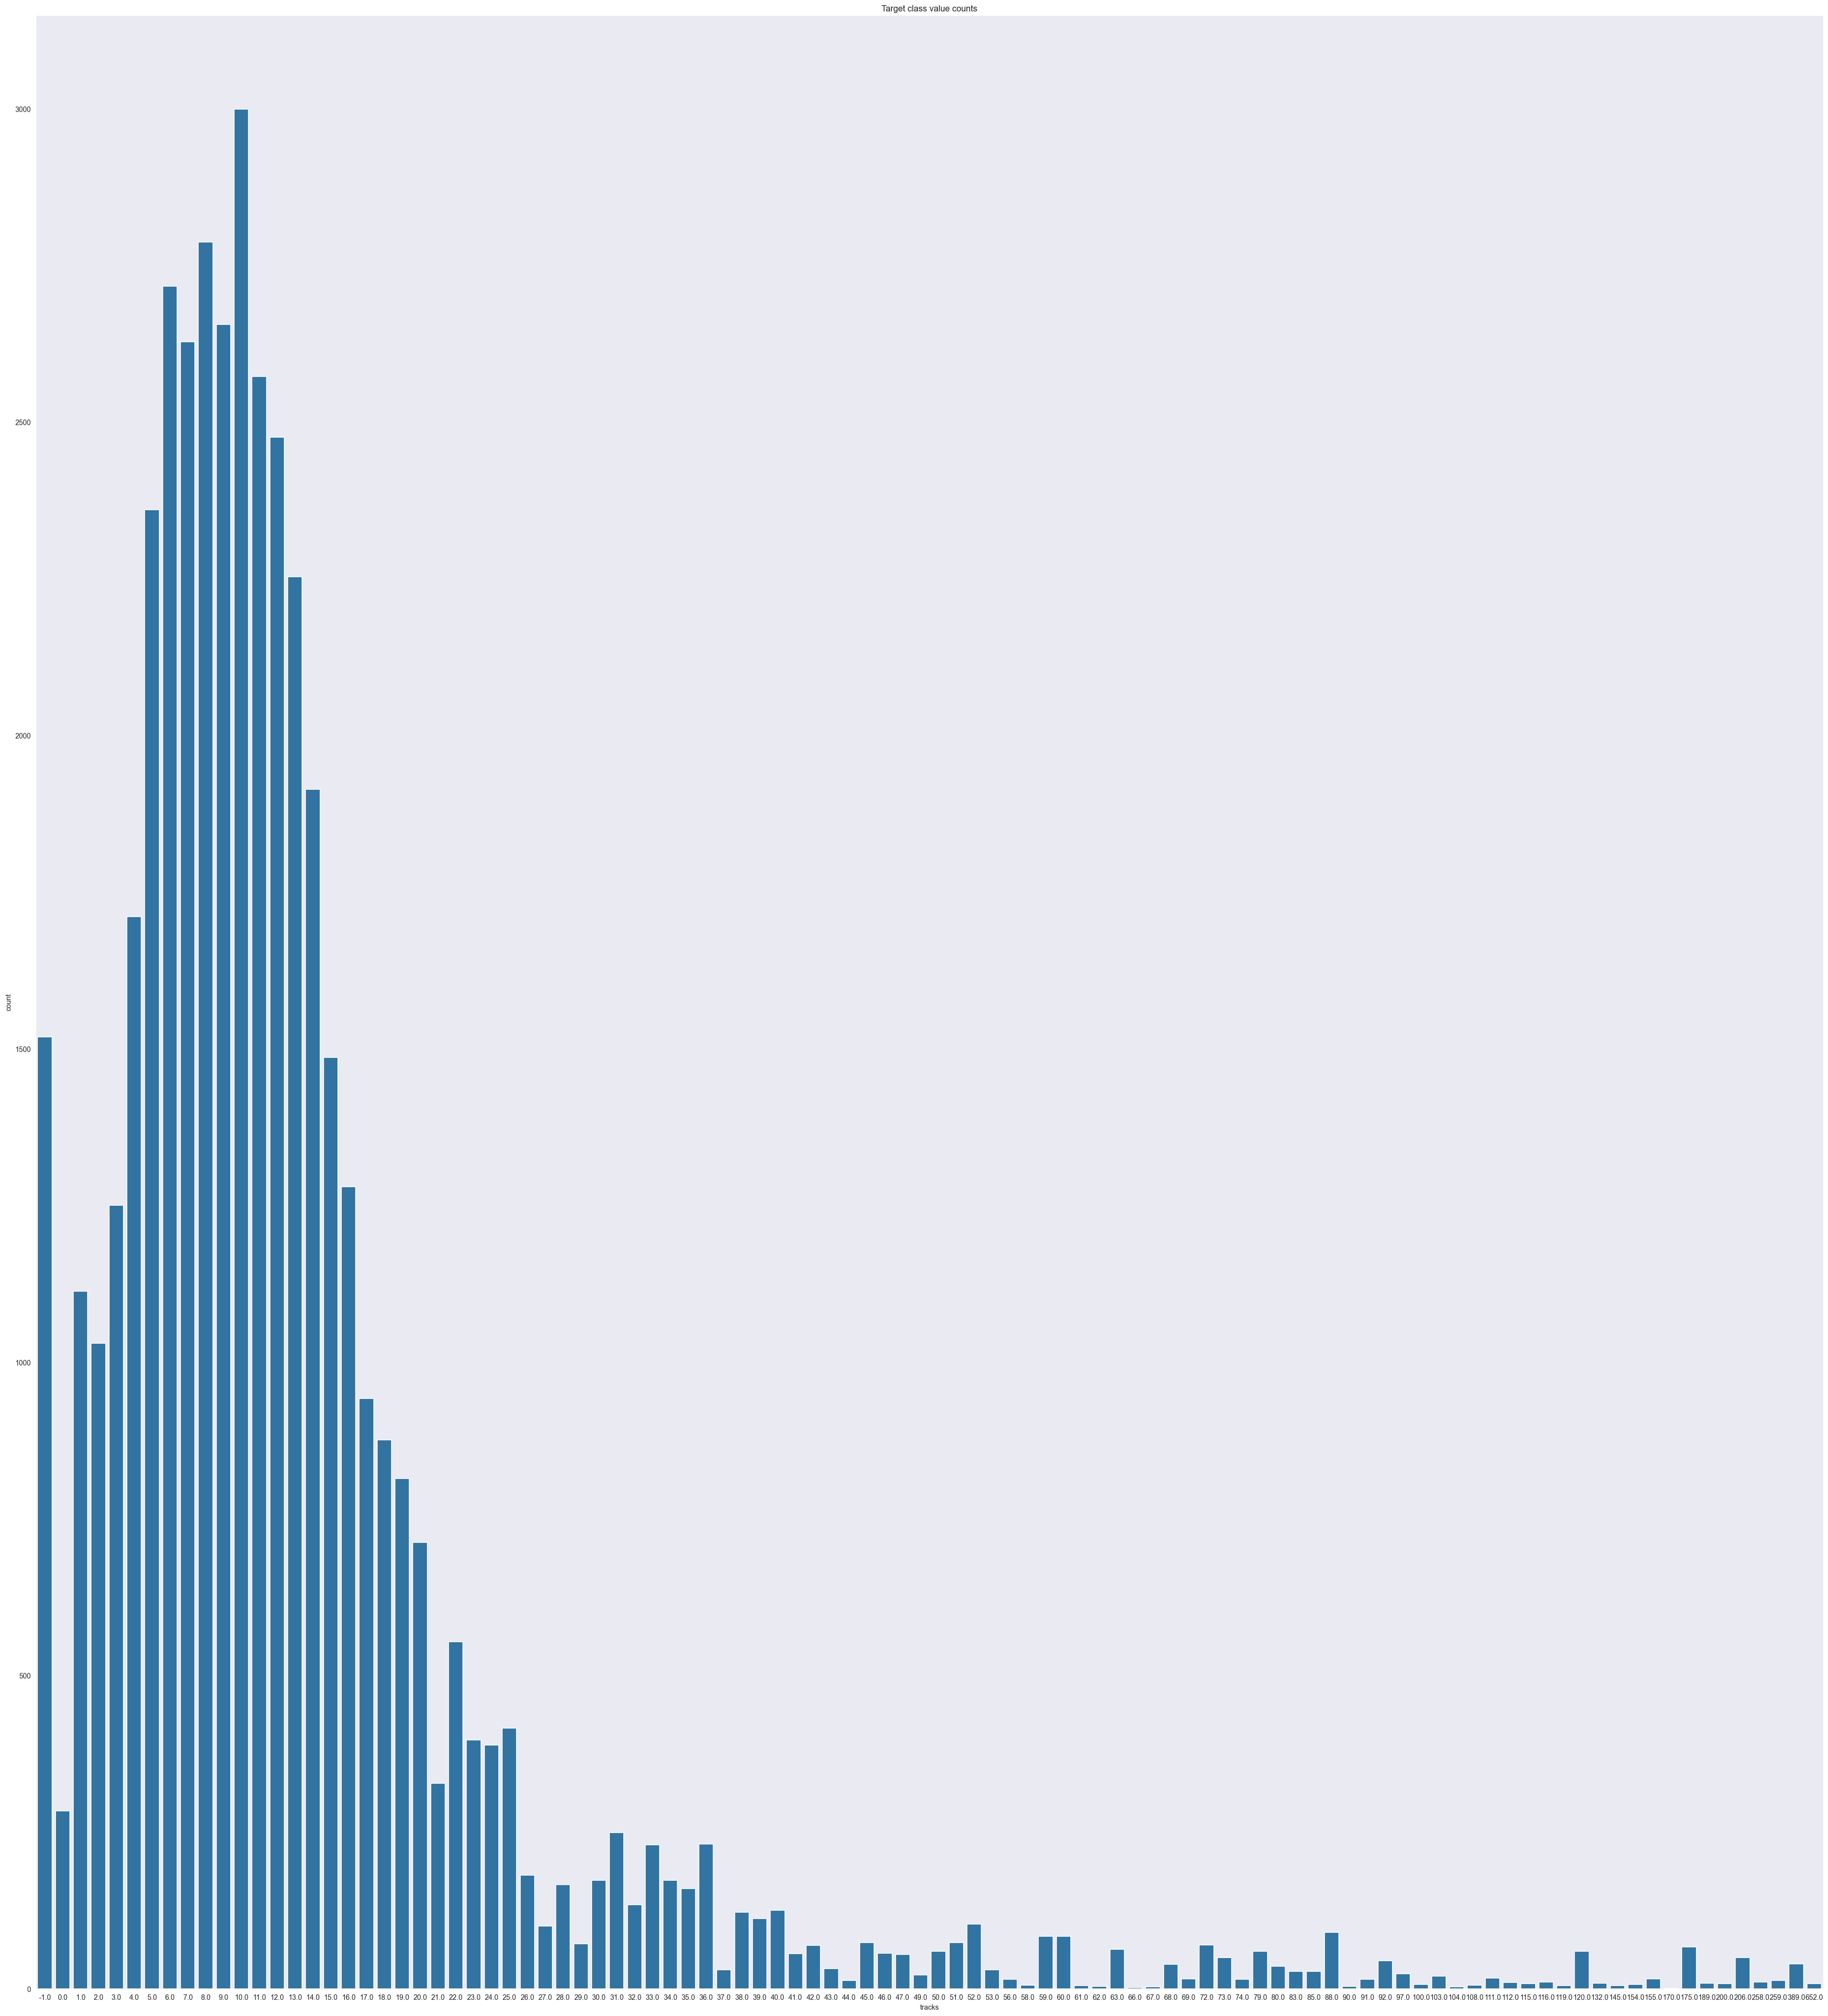

tracks
10.0     2999
8.0      2787
6.0      2717
9.0      2656
7.0      2628
         ... 
62.0        4
67.0        3
104.0       3
66.0        2
170.0       1
Name: count, Length: 100, dtype: int64


In [61]:
plt.figure(figsize=(45, 50), dpi=130)
plt.grid()
sns.countplot(x=tracks['tracks'])
plt.title("Target class value counts")
plt.show()
# plt.close()
print(tracks['tracks'].value_counts())

# Кластеризация

In [62]:
X = tracks
y = tracks['tracks']

In [63]:
X_scaled = MaxAbsScaler().fit_transform(X)

In [64]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [65]:
# расчёт матрицы связей
distance_matrix = linkage(X_scaled, method='ward', metric='euclidean')
#методы расчёты расстояний - 'ward', 'single','complete', 'average
distance_matrix

array([[2.77800000e+03, 2.78100000e+03, 0.00000000e+00, 2.00000000e+00],
       [1.69660000e+04, 1.69670000e+04, 0.00000000e+00, 2.00000000e+00],
       [2.48320000e+04, 2.48390000e+04, 0.00000000e+00, 2.00000000e+00],
       ...,
       [8.90710000e+04, 8.90800000e+04, 3.97957704e+01, 2.52870000e+04],
       [8.90820000e+04, 8.90830000e+04, 7.61535748e+01, 1.92570000e+04],
       [8.90840000e+04, 8.90850000e+04, 9.29071677e+01, 4.45440000e+04]])

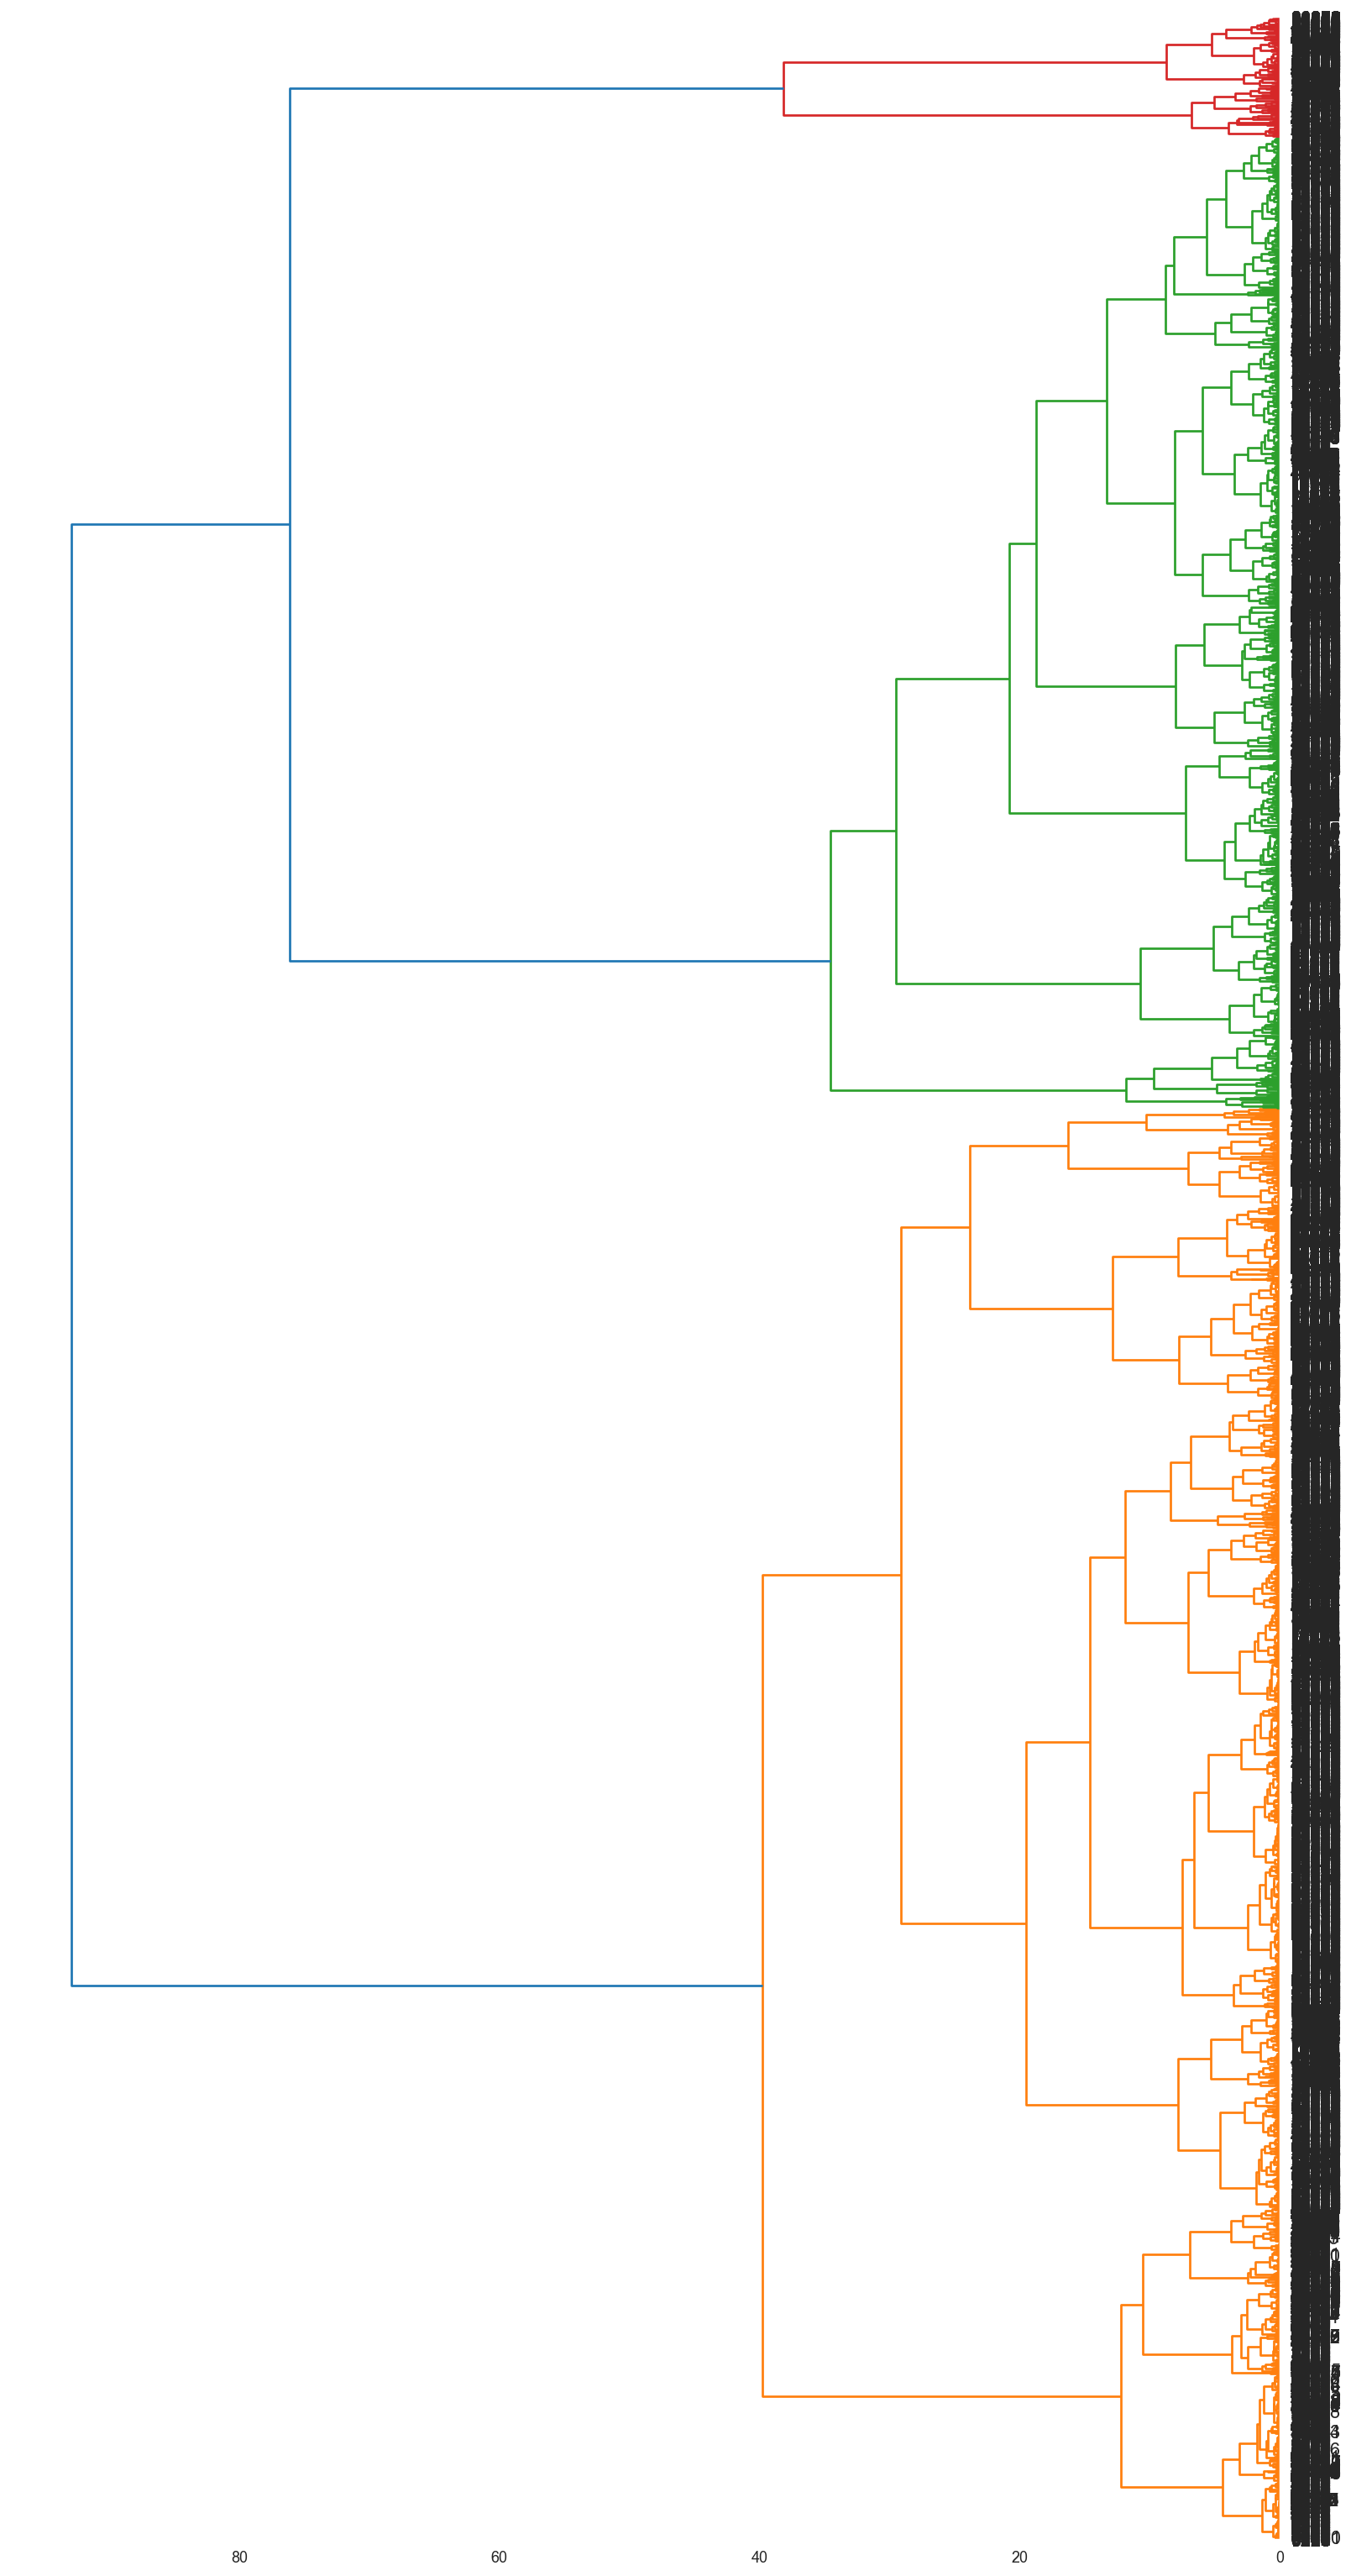

In [66]:
fig = plt.figure(figsize=(15, 30), dpi=130)
fig.patch.set_facecolor('white')
# построение дендрограммы
# разные цвета - разнвые автоматически определённые кластеры
R = dendrogram(distance_matrix, orientation='left', leaf_font_size=12)
plt.show()

In [67]:
# назначение меток кластеров
df = pd.DataFrame()
df['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')
df['target'] = y

In [75]:
scaled_data = MaxAbsScaler().fit_transform(X)
umap_kwargs = {'n_components': 2, 'n_neighbors': 25,
               'min_dist': 0.3,
               'metric': 'correlation'}
X_reduced = UMAP(**umap_kwargs).fit_transform(scaled_data)
# X_reduced = UMAP().fit_transform(scaled_data)
X_2_scaled = X_reduced

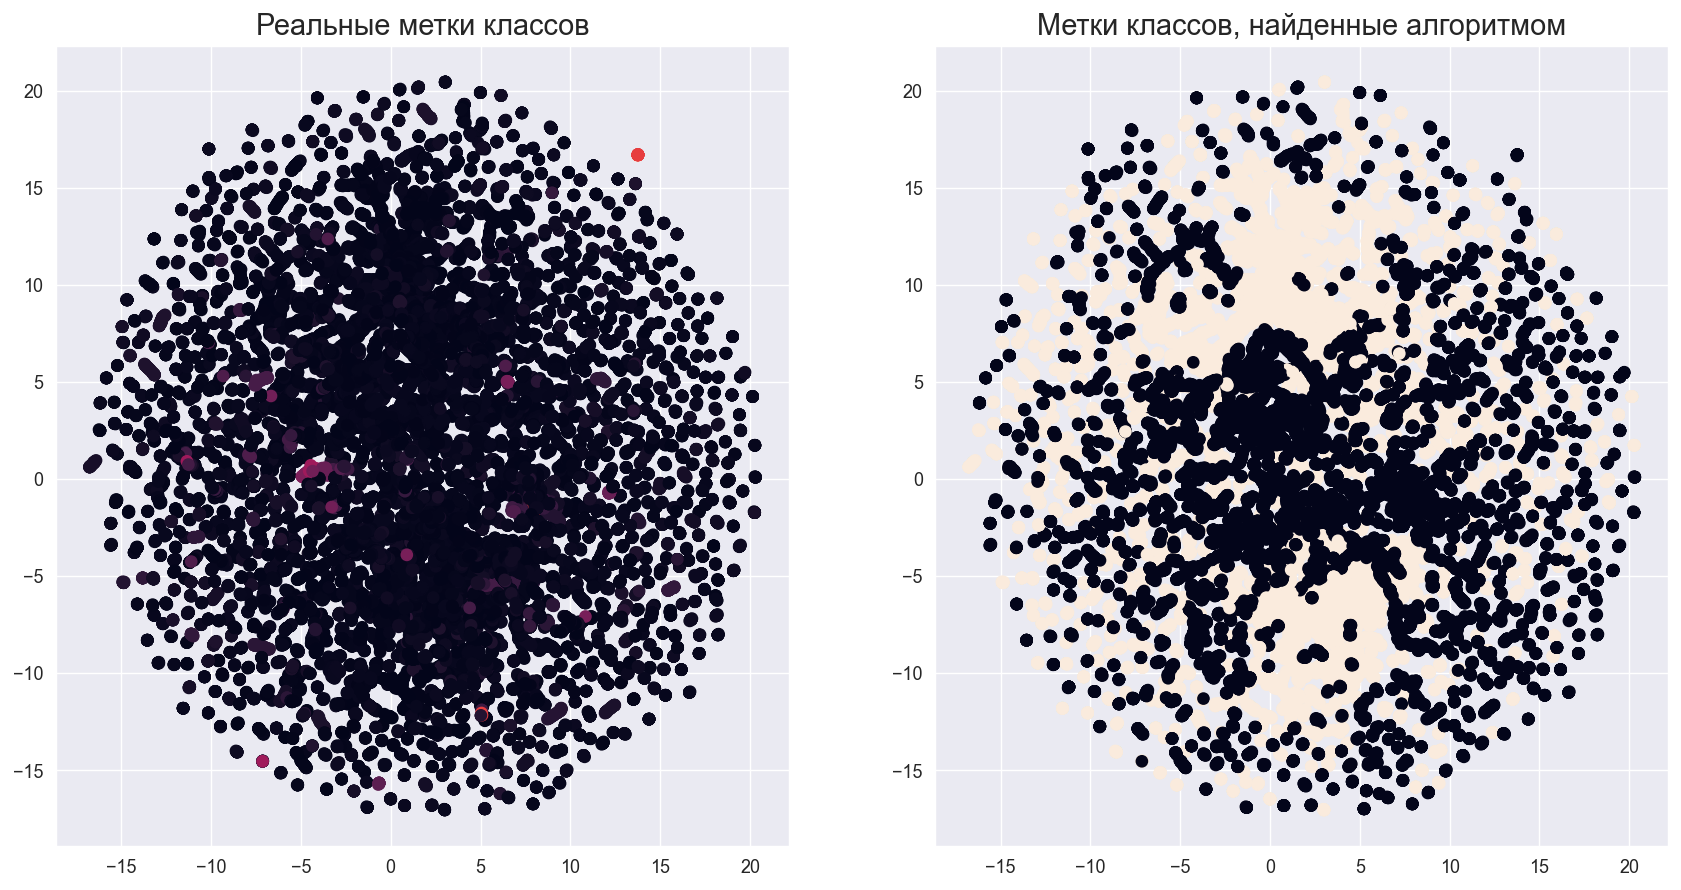

In [76]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8), dpi=130)
axes[0].scatter(X_2_scaled[:, 0], X_2_scaled[:, 1], c=df['target'])
axes[1].scatter(X_2_scaled[:, 0], X_2_scaled[:, 1], c=df['cluster_labels'])
axes[0].set_title('Реальные метки классов', fontsize=16)
axes[1].set_title('Метки классов, найденные алгоритмом', fontsize=16)
plt.show()

# Применение алгоритма k-means

In [77]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Расчёт показателей WCSS и Silh при разном числе кластеров
WCSS = []
Silh = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_data)
    df['cluster_labels'] = kmeans.fit_predict(scaled_data)
    WCSS.append(kmeans.inertia_)
    Silh.append(silhouette_score(scaled_data, df['cluster_labels'], metric='euclidean'))

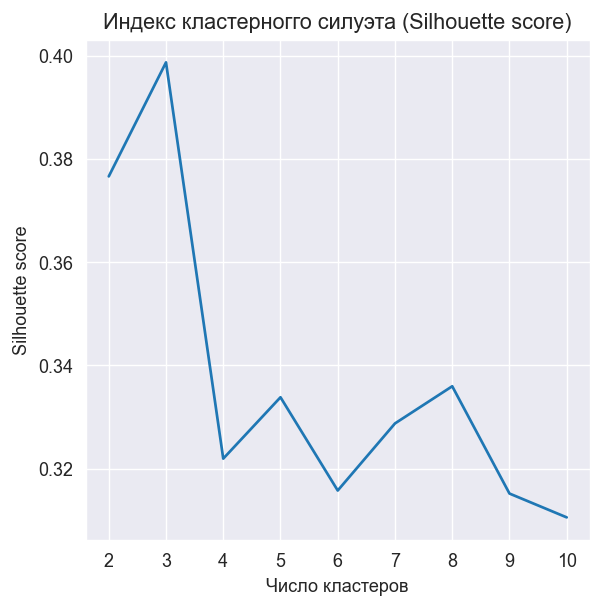

In [78]:
# построение графической зависимости для silhouette_score
fig = plt.figure(figsize=(5, 5), dpi=130)
plt.plot(range(2, 11), Silh)
plt.title("Индекс кластерногго силуэта (Silhouette score)")
plt.xlabel("Число кластеров")
plt.ylabel("Silhouette score")
plt.show()

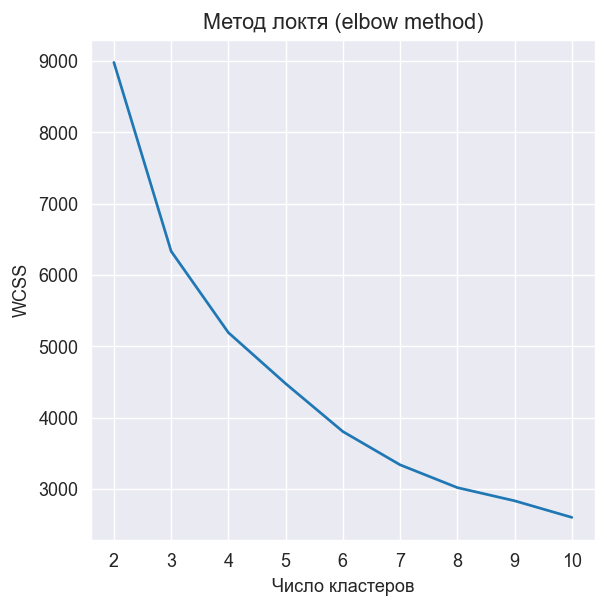

In [79]:
plt.close()
fig = plt.figure(figsize=(5, 5), dpi=130)
plt.plot(range(2, 11), WCSS)
plt.title("Метод локтя (elbow method)")
plt.xlabel("Число кластеров")
plt.ylabel("WCSS")
plt.show()

In [80]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X_scaled)
df['cluster_labels'] = kmeans.fit_predict(X_scaled)
plt.close()

In [81]:
# Вывод центроидов кластеров
print(kmeans.cluster_centers_)
cluster_centers_scaled = MinMaxScaler().fit_transform(kmeans.cluster_centers_)
data_with_cluster_centers = X_scaled.copy()
data_with_cluster_centers = pd.DataFrame(data_with_cluster_centers)
data_with_cluster_centers = pd.concat([data_with_cluster_centers, pd.DataFrame(cluster_centers_scaled)])
data_2_with_cluster_centers = UMAP(**umap_kwargs).fit_transform(data_with_cluster_centers)
# dir(data_with_cluster_centers)
# data_with_cluster_centers.add(pd.DataFrame(cluster_centers_scaled))

[[ 1.62545405e-02  1.87379059e-01  2.90220307e-03  1.74475766e-02
   1.36477285e-02  5.85561729e-01 -5.01403649e-01  5.09158813e-01
   1.50054764e-02  7.15647900e-04]
 [ 2.34767132e-02  4.64517144e-01  6.47100742e-03  2.34149380e-02
   3.95691214e-02  7.30293653e-01  9.64722916e-02  6.00723757e-01
   1.53876627e-02  1.18927668e-03]
 [ 1.85669552e-02  4.05778542e-01  6.50106824e-03  1.79147998e-02
   1.25216897e-02 -4.59944319e-01  4.16439959e-01  5.60877402e-01
   1.52955944e-02  1.21293568e-03]
 [ 2.63117324e-02  5.78662843e-01  1.16023563e-02  2.43878799e-02
   6.14513854e-02  5.96489678e-01 -4.93008634e-01  5.93284771e-01
   1.42486118e-02  1.64127079e-03]]


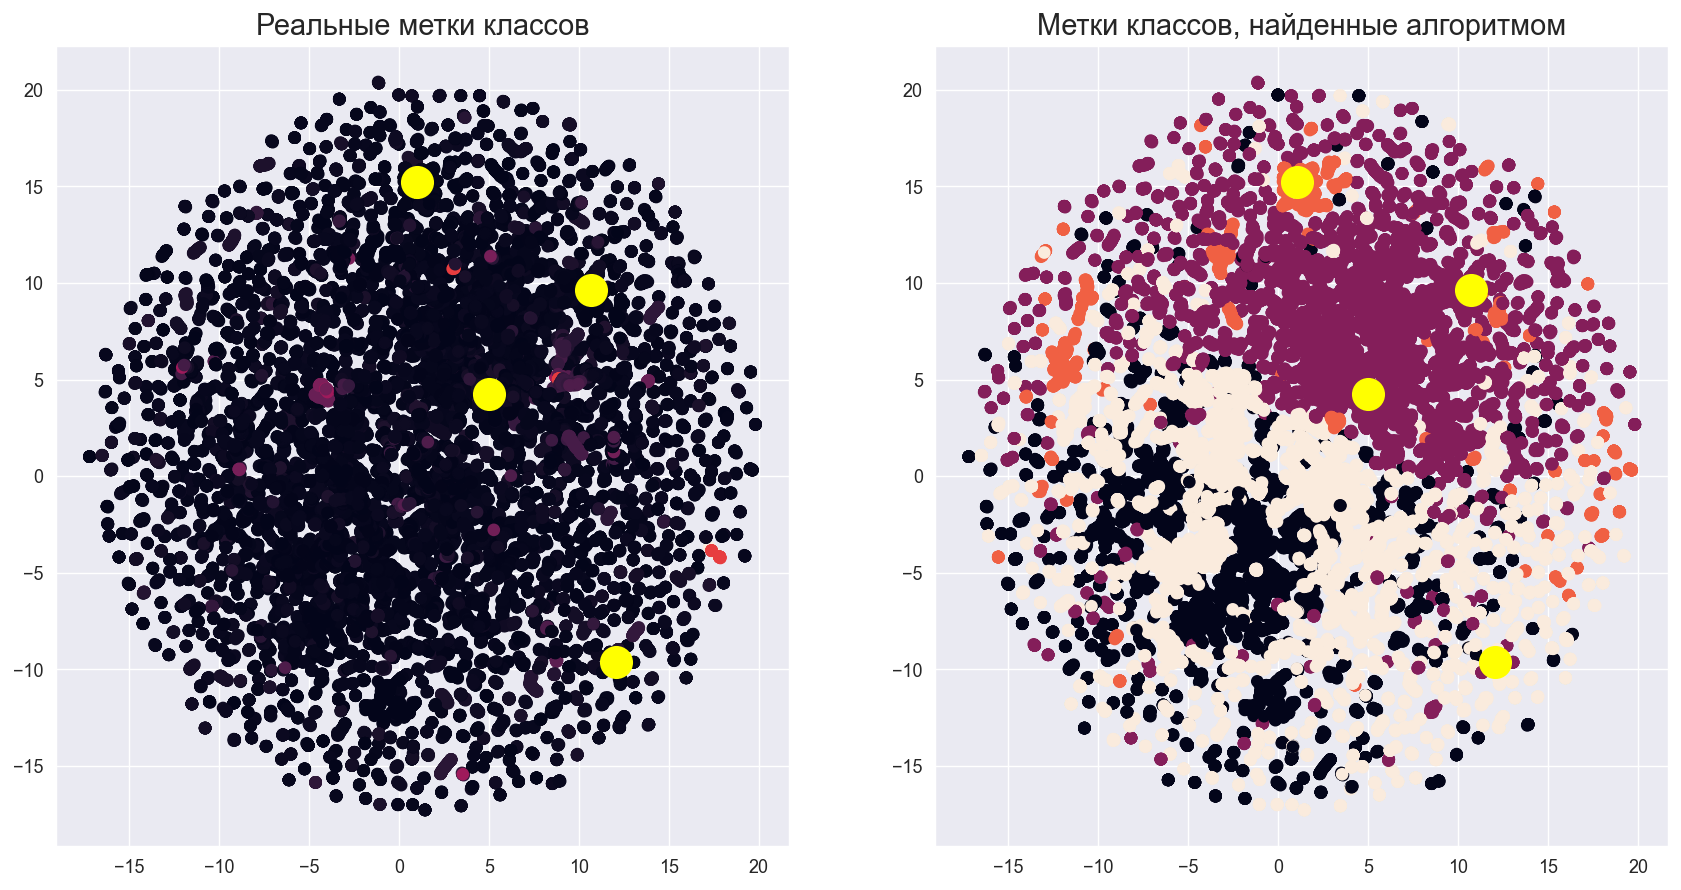

In [82]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8), dpi=130)
axes[0].scatter(data_2_with_cluster_centers[:-4, 0], data_2_with_cluster_centers[:-4, 1], c=df['target'])
axes[0].scatter(data_2_with_cluster_centers[-4:,0], data_2_with_cluster_centers[-4:,1], s=300, c='yellow', label='Centorids')
axes[0].set_title('Реальные метки классов', fontsize=16)

axes[1].scatter(data_2_with_cluster_centers[:-4, 0], data_2_with_cluster_centers[:-4, 1], c=df['cluster_labels'])
# Вывод центроидов кластеров
axes[1].scatter(data_2_with_cluster_centers[-4:,0], data_2_with_cluster_centers[-4:,1], s=300, c='yellow', label='Centorids')
axes[1].set_title('Метки классов, найденные алгоритмом', fontsize=16)
plt.show()

# fuzzy-c-means-алгоритм

In [83]:
from fuzzycmeans import FCM

In [84]:
X

,favorites,id,listens,tracks,comments,latitude,longitude,bit_rate,duration,interest
0,4.0,1.0,6073.0,7.0,0.0,40.058324,-74.405661,256000.0,168.0,4656.0
1,4.0,1.0,6073.0,7.0,0.0,40.058324,-74.405661,256000.0,237.0,1470.0
2,4.0,1.0,6073.0,7.0,0.0,40.058324,-74.405661,256000.0,206.0,1933.0
3,2.0,4.0,2710.0,13.0,2.0,51.895927,0.891874,256000.0,311.0,978.0
4,2.0,4.0,2710.0,13.0,2.0,51.895927,0.891874,256000.0,181.0,1060.0
...,...,...,...,...,...,...,...,...,...,...
44539,-1.0,-1.0,-1.0,-1.0,0.0,45.512303,-73.554431,160000.0,379.0,609.0
44540,-1.0,-1.0,-1.0,-1.0,0.0,45.512303,-73.554431,160000.0,299.0,980.0
44541,-1.0,-1.0,-1.0,-1.0,7.0,46.053219,8.986100,192000.0,269.0,41.0
44542,0.0,20610.0,31847.0,6.0,3.0,35.670479,139.740921,256000.0,193.0,1912.0


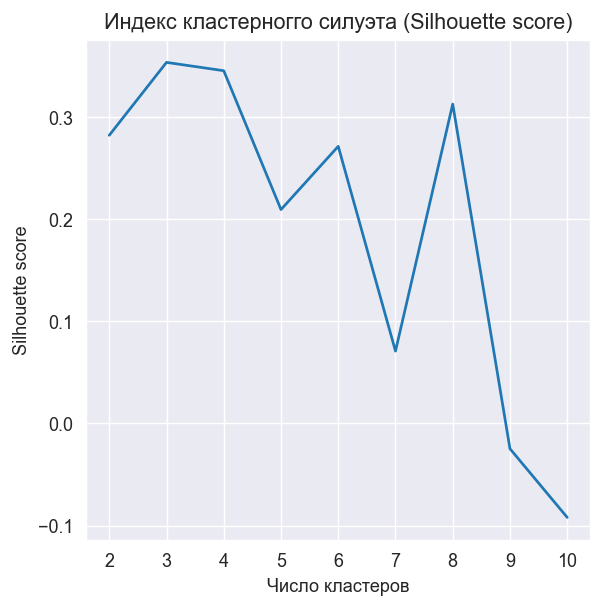

In [85]:
Silh = []
for i in range(2,11):
    fcm = FCM(n_clusters=i, max_iter=1)
    fcm.fit(X_2_scaled)
    df['cluster_labels'] = fcm.predict(np.array(X_2_scaled)).argmax(axis=1)
    Silh.append(silhouette_score(X_2_scaled[:,:], df['cluster_labels'], metric='euclidean'))
fig = plt.figure(figsize=(5, 5), dpi=130)
plt.plot(range(2, 11), Silh)
plt.title("Индекс кластерногго силуэта (Silhouette score)")
plt.xlabel("Число кластеров")
plt.ylabel("Silhouette score")
plt.show()

[array([ 1.35641971e+00,  9.79515524e+03,  2.52177892e+04,  1.38551991e+01,
        3.01929814e+00,  3.96991020e+01, -3.79598796e+01,  2.57393680e+05,
        2.73640656e+02,  3.69943161e+03]), array([ 1.35841278e+00,  9.82042593e+03,  2.60602042e+04,  1.43086745e+01,
        3.07052266e+00,  3.98983445e+01, -3.87577238e+01,  2.57330181e+05,
        2.73613689e+02,  4.05596921e+03])]


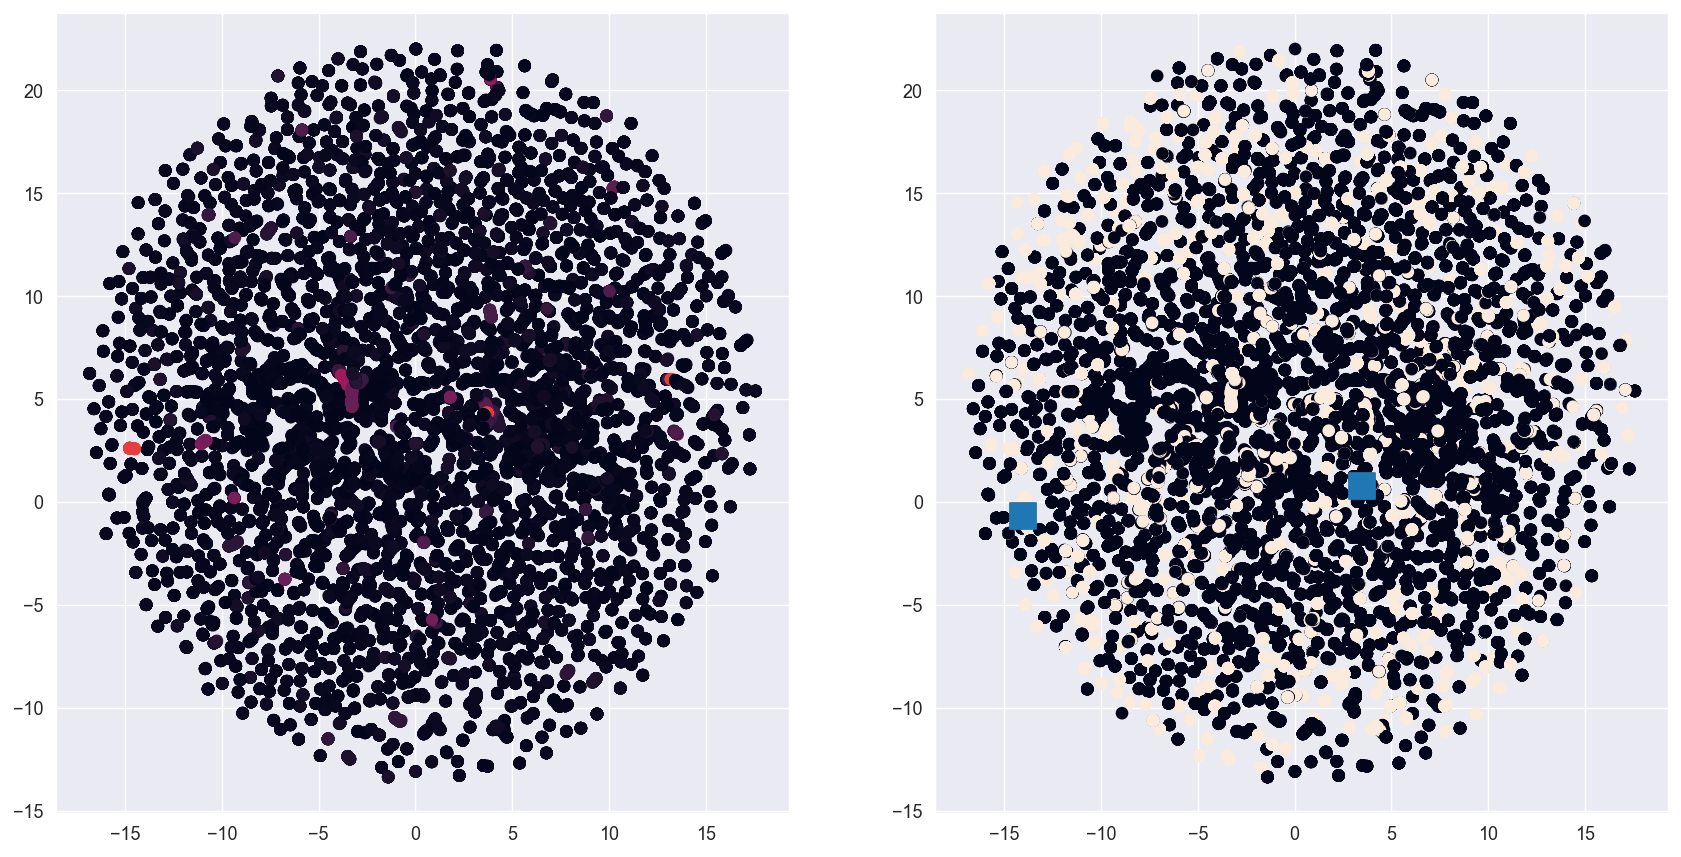

In [87]:
fcm = FCM(n_clusters=2, m = 2, max_iter=1)
fcm.fit(X)
df['cluster_labels'] = fcm.predict(np.array(X)).argmax(axis=1)
# outputs
fcm_centers = fcm.cluster_centers_
cluster_centers_scaled = MinMaxScaler().fit_transform(fcm_centers)
data_with_cluster_centers = X_scaled.copy()
data_with_cluster_centers = pd.DataFrame(data_with_cluster_centers)
data_with_cluster_centers = pd.concat([data_with_cluster_centers, pd.DataFrame(cluster_centers_scaled)])
data_2_with_cluster_centers = UMAP().fit_transform(data_with_cluster_centers)

print(fcm_centers)
fcm_labels  = fcm.u.argmax(axis=1)
# plot result
plt.close()
fig, axes = plt.subplots(1, 2, figsize=(16, 8), dpi=130)
axes[0].scatter(data_2_with_cluster_centers[:-2,0], data_2_with_cluster_centers[:-2,1],c=df['target'])
axes[1].scatter(data_2_with_cluster_centers[:-2,0], data_2_with_cluster_centers[:-2,1], c = df['cluster_labels'])
axes[1].scatter(data_2_with_cluster_centers[-2:,0], data_2_with_cluster_centers[-2:,1],marker="s",s=200)
plt.show()

# DBSCAN-алгоритм

In [88]:
#кол-во признаков в наборе - 11
from math import sqrt

In [89]:
# рассчёт расстояния для кажого объекта до его k-го ближайшего соседа
def calucate_kn_distance(X,k):
    kn_distance = []
    for i in range(len(X)):
        euc_dist = []
        for j in range(len(X)):
            euc_dist.append(sqrt((X[i,0]-X[j,0])**2+(X[i,1]-X[j,1])**2))
        euc_dist.sort()    
        kn_distance.append(euc_dist[k])    
    return kn_distance

In [90]:
len(X_2_scaled)

44544

In [91]:
plt.close()
eps_dist = calucate_kn_distance(X_2_scaled,5) # считаем для каждого объекта расстояние до его 5-го ближайшего соседа
plt.hist(eps_dist, bins=30)
plt.xlabel("Eps растояние")
plt.ylabel("Число объектов")
plt.show()

KeyboardInterrupt: 

In [92]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, adjusted_mutual_info_score
db = DBSCAN(eps=0.8, min_samples=2, metric='euclidean').fit(X_2_scaled)
core_sample_mask = np.zeros_like(db.labels_,dtype=bool)
core_sample_mask[db.core_sample_indices_] = True
labels = db.labels_

#число кластеров без шума если он имеется
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

labels_true = df['target']
print("Число кластеров {}".format(n_clusters_))
print("Число шумовых объектов: {}".format(n_noise_))
print("Homogeneity {}".format(homogeneity_score(labels_true, labels)))
print("Completness {}".format(completeness_score(labels_true, labels)))
print("V-measure {}".format(v_measure_score(labels_true, labels)))
print("Adjusted Rand Index {}".format(adjusted_rand_score(labels_true, labels)))
print("Adjusted Mutual Information {}".format(adjusted_mutual_info_score(labels_true, labels)))
print("Silhouette score {}".format(silhouette_score(X_2_scaled, labels)))


Число кластеров 145
Число шумовых объектов: 0
Homogeneity 0.07185312643638453
Completness 0.4066367524140542
V-measure 0.1221263950455283
Adjusted Rand Index 0.003602729218625356
Adjusted Mutual Information 0.09595810586602391
Silhouette score -0.35748428106307983


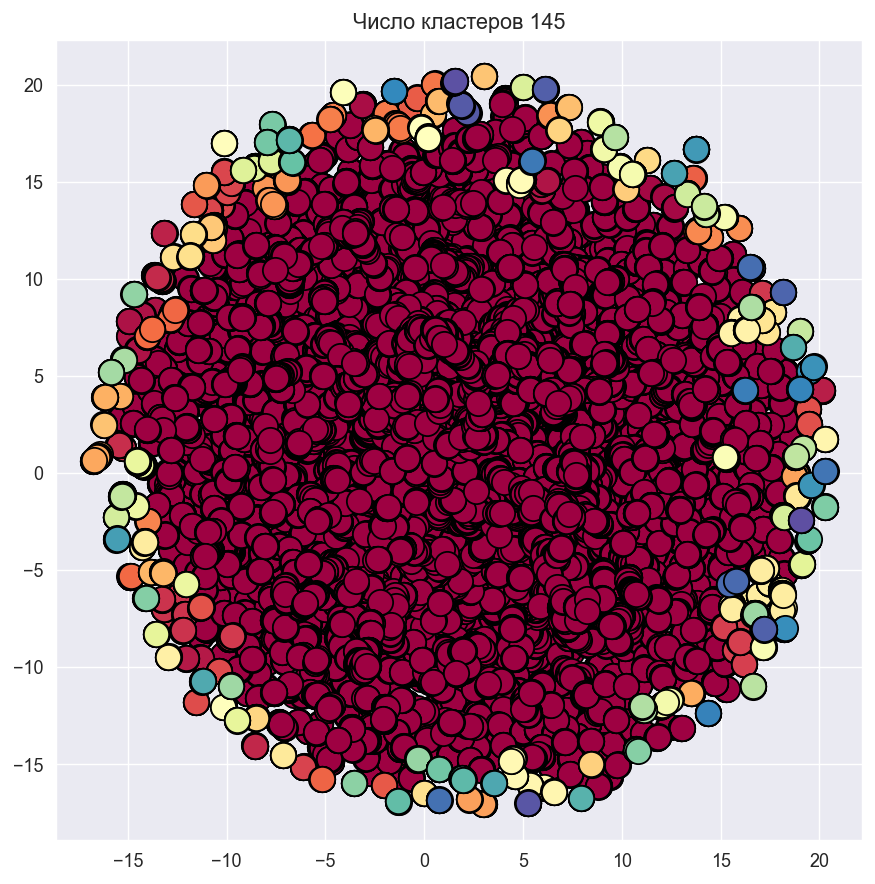

In [97]:
# визуализация
plt.close()
fig = plt.figure(figsize=(8, 8), dpi=130)
# задание цвета для маркеров, обозначающих разные классы
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # черный цвет используется для шумовых объектов
        col = [0,0,0,1] 
    class_member_mask = (labels == k)
    xy = X_2_scaled[class_member_mask & core_sample_mask]
    plt.plot(xy[:,0],xy[:,1],"o", markerfacecolor=tuple(col), markeredgecolor="k", markersize=14)
    
    xy = X_2_scaled[class_member_mask & ~core_sample_mask]
    plt.plot(xy[:,0],xy[:,1],"o", markerfacecolor=tuple(col), markeredgecolor="k", markersize=6)
    
plt.title("Число кластеров {}".format(n_clusters_))
plt.show()
